In [1]:
## Multi- Spectrum Fitting by Segment

import numpy as np
import pandas as pd
import qgrid
import os, sys
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline


sys.path.append(r'C:\Users\ema3\Documents\MATS\MATS')# set location of HAPI.py module
%matplotlib inline
#from hapi import *
from MATS import *


import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("poster")


HAPI version: 1.1.0.9.6
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


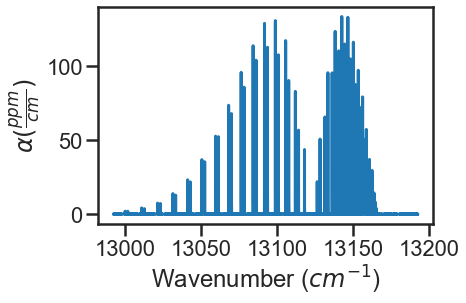

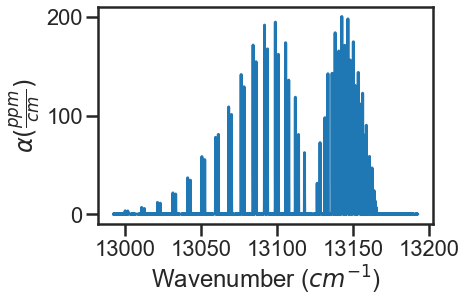

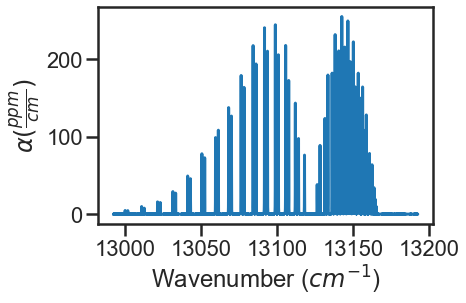

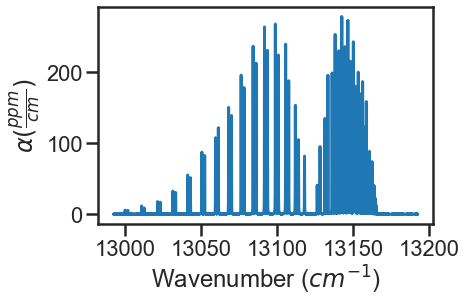

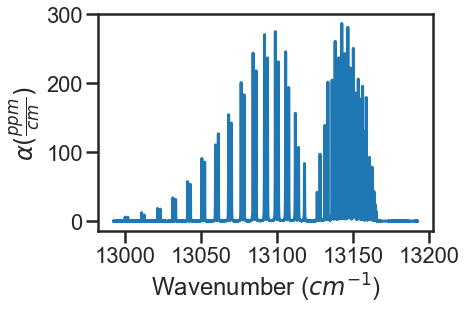

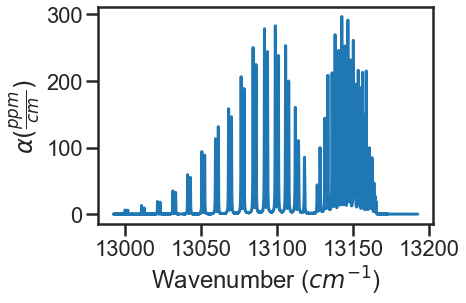

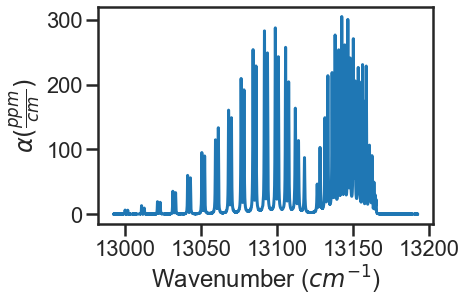

In [2]:
#Read-In Simulated Drouin A-Band Spectra

path = r'C:\Users\ema3\Documents\MATS\MATS\Examples\A-Band - CIA' # Location of the Summary Data File
os.chdir(path)


IntensityThreshold = 1e-30 #intensities must be above this value to be simulated
Fit_Intensity = 1e-27#intensities must be above this value for the line to be fit
wave_range = 1.5 #range outside of experimental x-range to simulate
segment_column = None
etalon = {}
sample_concentration = {7:  0.209}



freq_column = 'Wavenumber + Noise (cm-1)'
tau_column = 'Alpha + LM + CIA'
pressure_column = 'Pressure (Torr)'
temp_column = 'Temperature (C)'
order_baseline_fit = 2



spec_1 = Spectrum(  '100 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_2 = Spectrum(  '200 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_3 = Spectrum(  '400 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_4 = Spectrum(  '700 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_5 = Spectrum(  '1000 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_6 = Spectrum(  '2000 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_7 = Spectrum(  '3000 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)

spec_1.plot_wave_alpha()
spec_2.plot_wave_alpha()
spec_3.plot_wave_alpha()
spec_4.plot_wave_alpha()
spec_5.plot_wave_alpha()
spec_6.plot_wave_alpha()
spec_7.plot_wave_alpha()


In [3]:
#Put Together Dataset
linelist = r'C:\Users\ema3\Documents\MATS\MATS\Linelists' # Location of the Summary Data File
os.chdir(linelist)
PARAM_LINELIST = pd.read_csv('O2_ABand_Drouin_2017_linelist.csv')

os.chdir(path)

SPECTRA = Dataset([spec_1, spec_2, spec_3, spec_4, spec_5, spec_6, spec_7], 'CIA Spectra Study', PARAM_LINELIST, baseline_order = order_baseline_fit) 

#Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order
BASE_LINELIST = SPECTRA.generate_baseline_paramlist()




In [4]:
# Look at the spectra using just the Drouin LInelist
FITPARAMS = Generate_FitParam_File(SPECTRA, PARAM_LINELIST, BASE_LINELIST,
                                   lineprofile = 'SDVP', linemixing = True, 
                                      fit_intensity = Fit_Intensity, threshold_intensity = Fit_Intensity, 
                                      nu_constrain = True, sw_constrain = True, gamma0_constrain = True, delta0_constrain = True, 
                                       aw_constrain = True, as_constrain = True, 
                                       nuVC_constrain = True, eta_constrain =True, linemixing_constrain = True)


FITPARAMS.generate_fit_param_linelist_from_linelist(vary_nu = {7:{1:False, 2:False, 3:False}}, vary_sw = {7:{1:False, 2:False, 3:False}},
                                                    vary_gamma0 = {7:{1: False, 2:False, 3: False}}, vary_n_gamma0 = {7:{1:False}}, 
                                                    vary_delta0 = {7:{1: False, 2:False, 3: False}}, vary_n_delta0 = {7:{1:False}}, 
                                                    vary_aw = {7:{1: False, 2:False, 3: False}}, vary_n_gamma2 = {7:{1:False}}, 
                                                    vary_as = {7:{1:False}}, vary_n_delta2 = {7:{1:False}}, 
                                                    vary_nuVC = {7:{1:False}}, vary_n_nuVC = {7:{1:False}},
                                                    vary_eta = {}, vary_linemixing = {7:{1:False}})

FITPARAMS.generate_fit_baseline_linelist(vary_baseline = False, vary_molefraction = {7:False, 1:False}, vary_xshift = False, 
                                      vary_etalon_amp= False, vary_etalon_period= False, vary_etalon_phase= False)




,Pressure,Segment Number,Temperature,baseline_a,baseline_b,baseline_c,molefraction_O2,x_shift,Pressure_err,Pressure_vary,...,baseline_a_err,baseline_a_vary,baseline_b_err,baseline_b_vary,baseline_c_err,baseline_c_vary,molefraction_O2_err,molefraction_O2_vary,x_shift_err,x_shift_vary
Spectrum Number,,,,,,,,,,,,,,,,,,,,,
1.0,0.131579,1.0,298.15,0.002084,0.0,0.0,0.209,0.0,0,False,...,0,False,0,False,0,False,0,False,0,False
2.0,0.263158,1.0,298.15,0.016234,0.0,0.0,0.209,0.0,0,False,...,0,False,0,False,0,False,0,False,0,False
3.0,0.526316,1.0,298.15,-0.001008,0.0,0.0,0.209,0.0,0,False,...,0,False,0,False,0,False,0,False,0,False
4.0,0.921053,1.0,298.15,0.044299,0.0,0.0,0.209,0.0,0,False,...,0,False,0,False,0,False,0,False,0,False
5.0,1.315789,1.0,298.15,0.070434,0.0,0.0,0.209,0.0,0,False,...,0,False,0,False,0,False,0,False,0,False
6.0,2.631579,1.0,298.15,0.097480,0.0,0.0,0.209,0.0,0,False,...,0,False,0,False,0,False,0,False,0,False
7.0,3.947368,1.0,298.15,0.133155,0.0,0.0,0.209,0.0,0,False,...,0,False,0,False,0,False,0,False,0,False


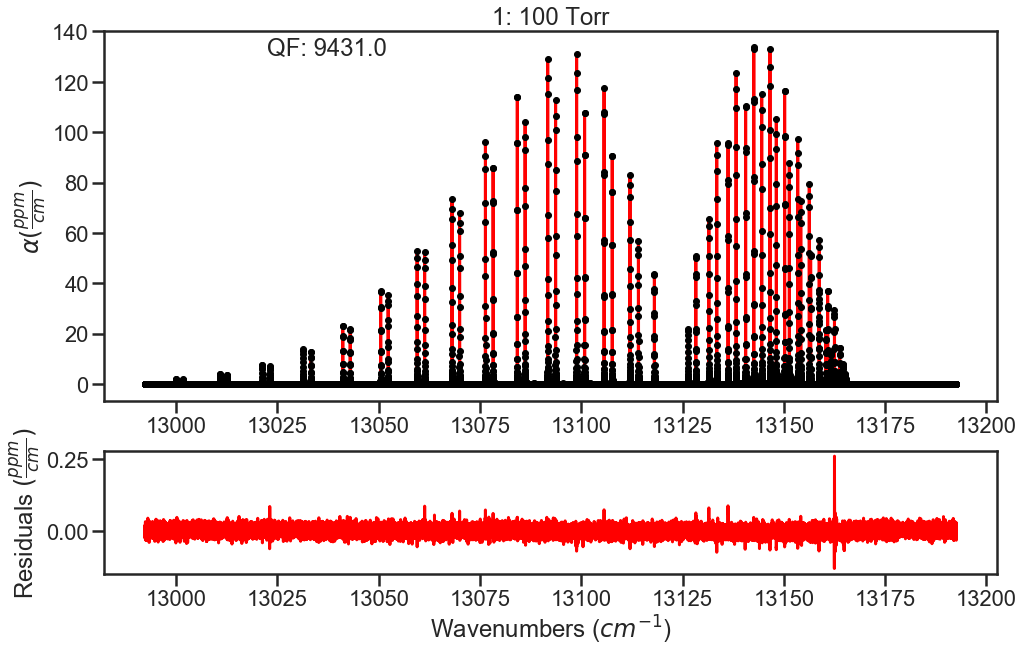

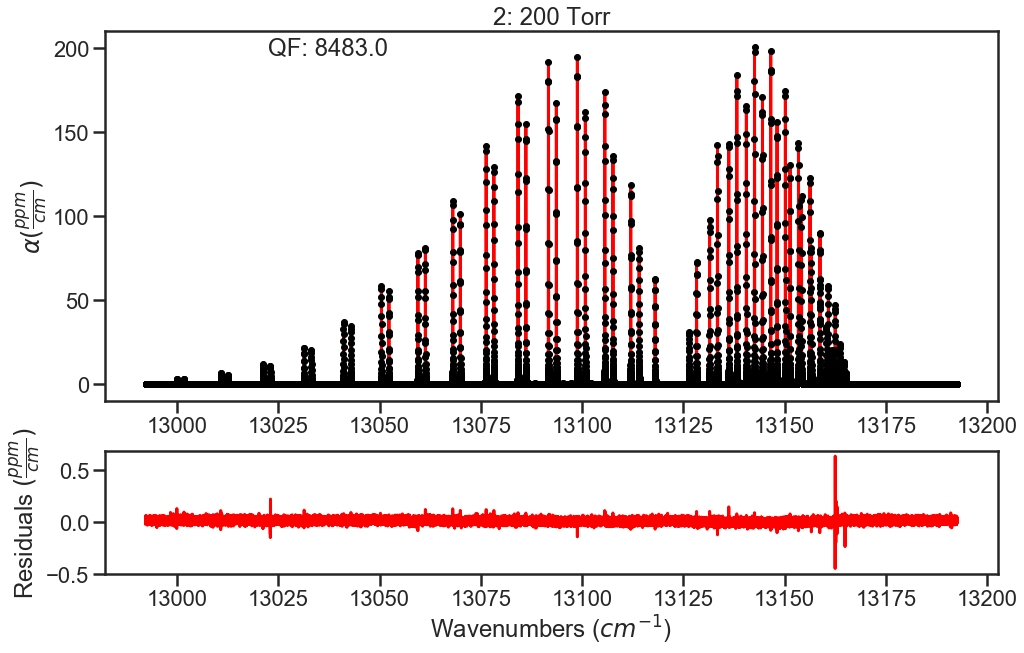

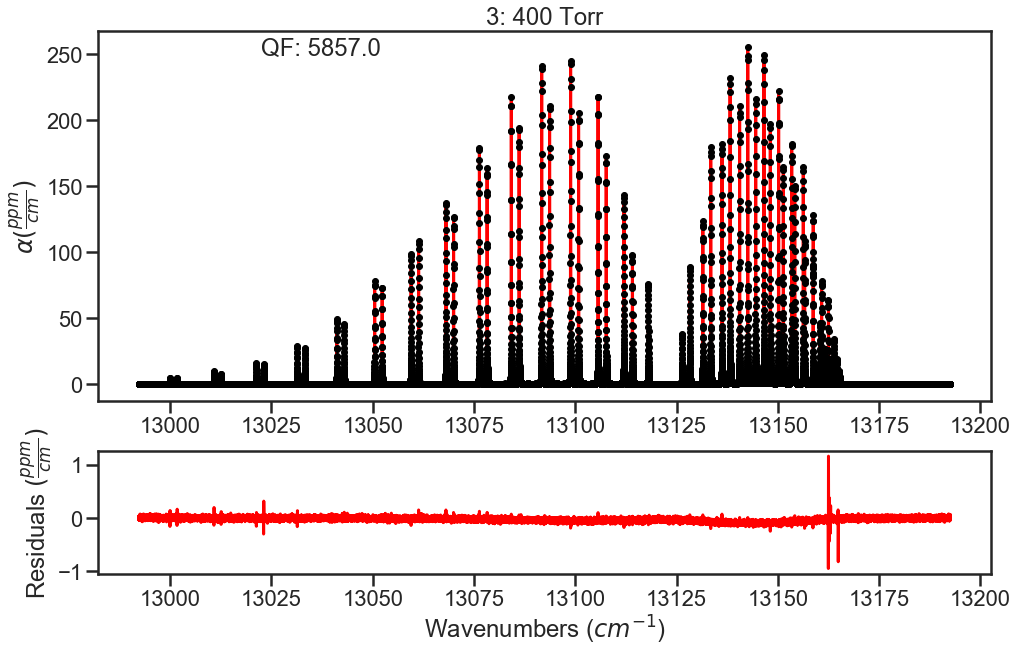

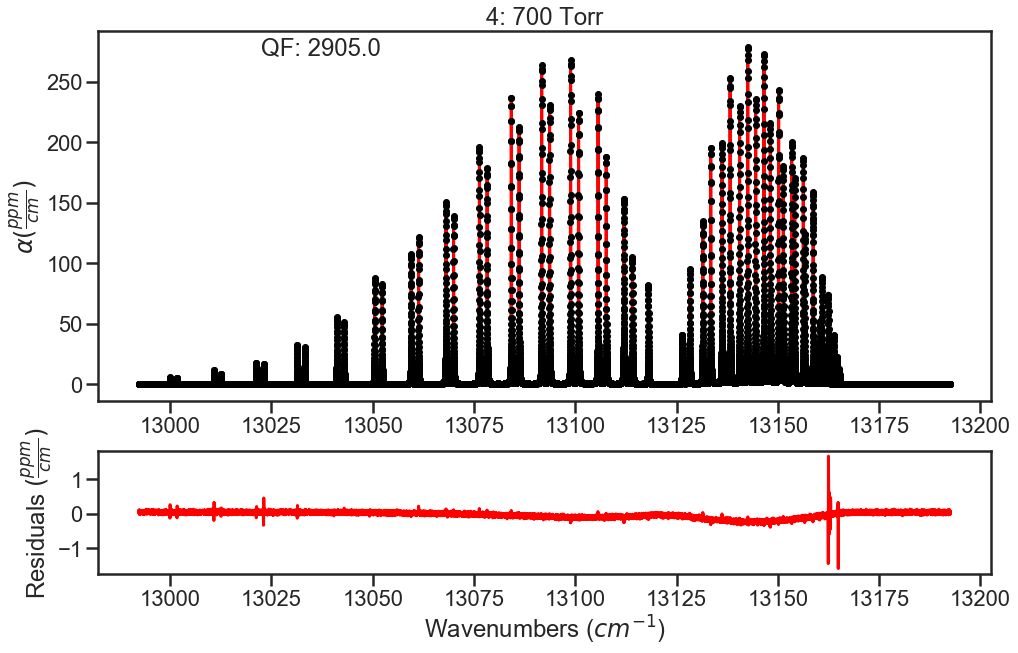

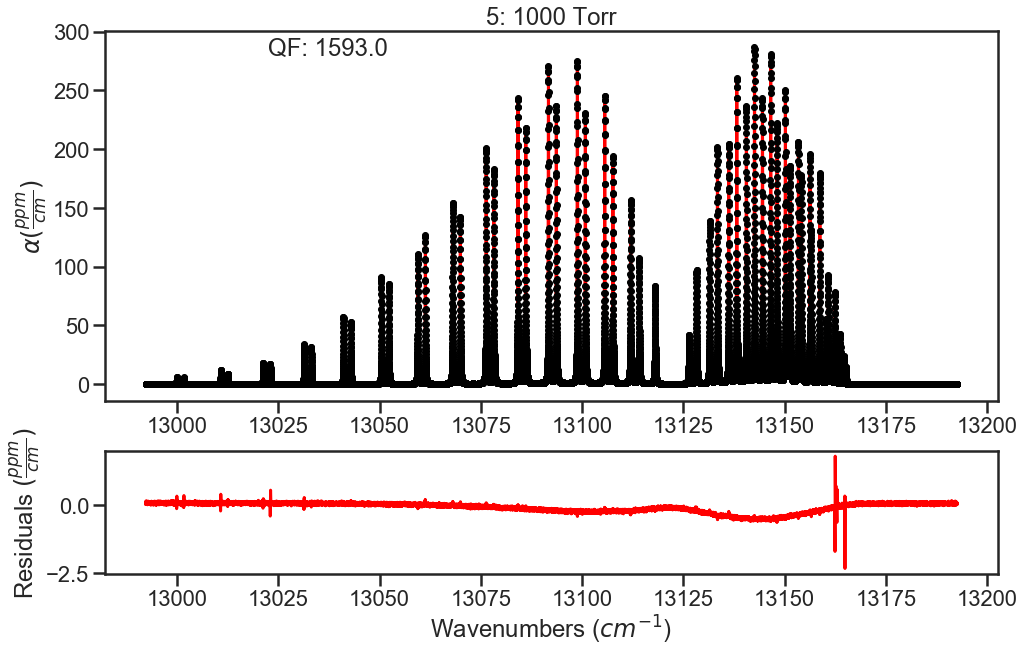

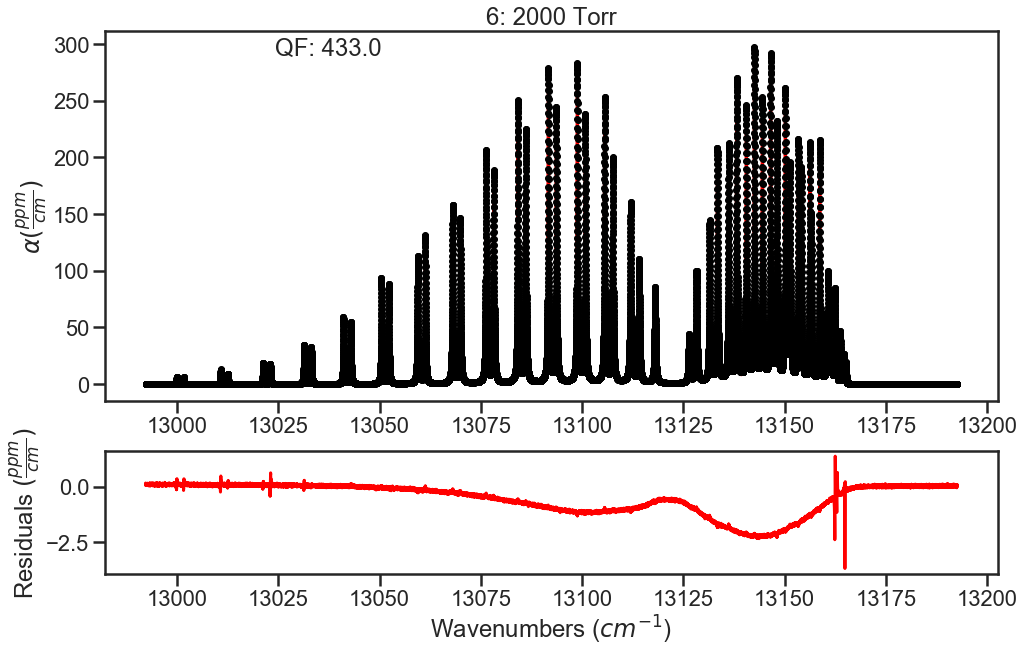

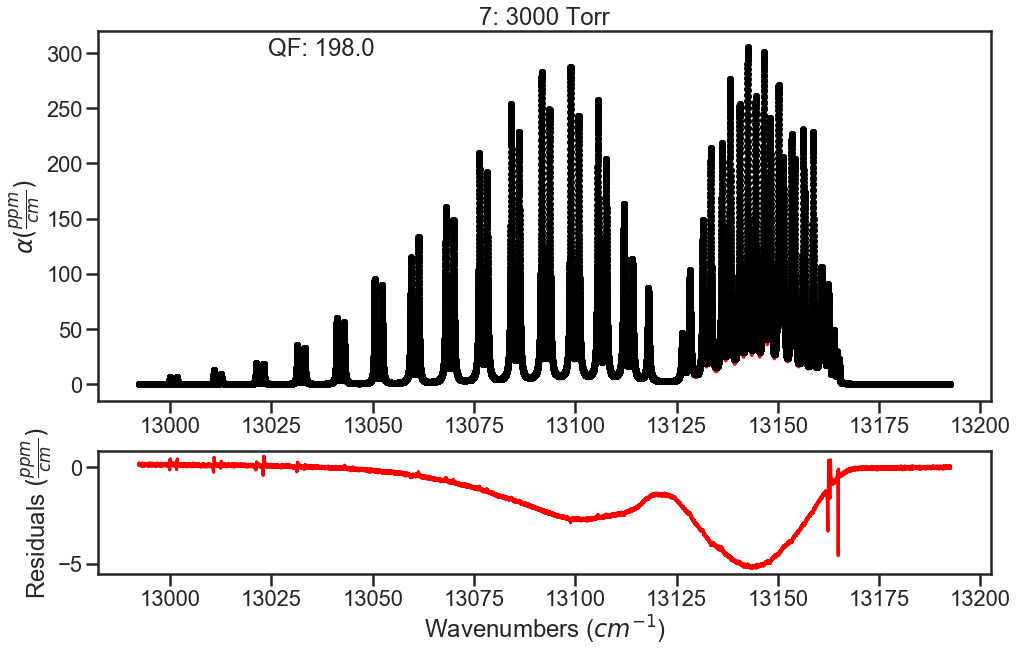

,Spectrum Number,Spectrum Name,Frequency (MHz),Wavenumber (cm-1),Pressure (Torr),Temperature (C),Tau (us),Tau Error (%),Alpha (ppm/cm),Model (ppm/cm),Residuals (ppm/cm),QF,Background,CIA (ppm/cm)
0,1,100 Torr,3.894976e+08,12992.240,100.0,25.0,16004.320115,None,0.002084,0.003888,0.001803,9431.0,0.133155,0
1,1,100 Torr,3.894977e+08,12992.246,100.0,25.0,3936.671355,None,0.008473,0.004480,-0.003993,9431.0,0.133155,0
2,1,100 Torr,3.894979e+08,12992.252,100.0,25.0,5691.690989,None,0.005861,0.005458,-0.000402,9431.0,0.133155,0
3,1,100 Torr,3.894981e+08,12992.258,100.0,25.0,1046.679855,None,0.031869,0.007197,-0.024671,9431.0,0.133155,0
4,1,100 Torr,3.894983e+08,12992.264,100.0,25.0,4650.263749,None,0.007173,0.010409,0.003236,9431.0,0.133155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33390,7,3000 Torr,3.955036e+08,13192.580,3000.0,25.0,579.686835,None,0.057542,0.124413,0.066871,198.0,0.133155,0
33391,7,3000 Torr,3.955038e+08,13192.586,3000.0,25.0,168.204864,None,0.198308,0.116212,-0.082097,198.0,0.133155,0
33392,7,3000 Torr,3.955040e+08,13192.592,3000.0,25.0,286.509750,None,0.116423,0.116209,-0.000214,198.0,0.133155,0
33393,7,3000 Torr,3.955041e+08,13192.598,3000.0,25.0,182.669788,None,0.182605,0.116207,-0.066398,198.0,0.133155,0


In [5]:
# Evaluate with Floating Anything
fit_data = Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList',
                       minimum_parameter_fit_intensity = Fit_Intensity)
params = fit_data.generate_params()
for param in params:  
    if 'delta0' in param:
        params[param].set( min = -0.01, max = 0)
    if 'gamma0' in param:
        params[param].set( min = 0.02, max = 0.12)
    if 'SD_gamma' in param:
        params[param].set(min = 0, max = 0.3)   
    if 'nuVC' in param:
        params[param].set(min = 0, max = 0.3)
    if 'SD_delta' in param:
        params[param].set(min = 0, max = 0.3)        
    if 'sw_' in param:
        params[param].set(min = 0)
    

result = fit_data.fit_data(params, wing_wavenumbers = 50, wing_method = 'wing_wavenumbers', xtol = 1e-7, maxfev = 2000, ftol = 1e-7)

#print (result.params.pretty_print())

fit_data.residual_analysis(result, indv_resid_plot=True)
fit_data.update_params(result)
SPECTRA.generate_summary_file(save_file = True)

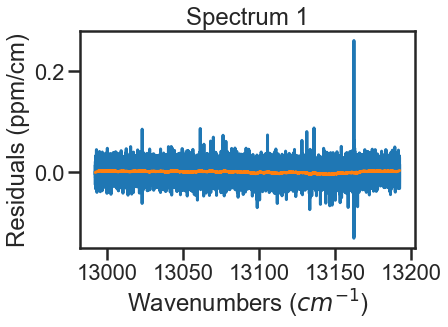

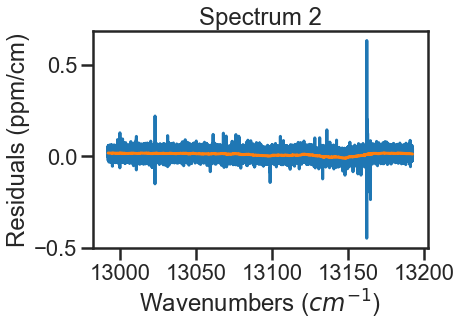

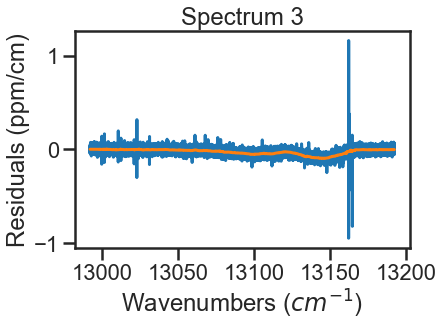

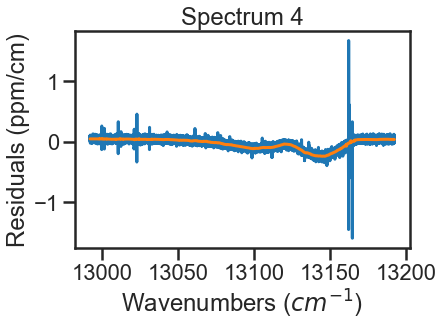

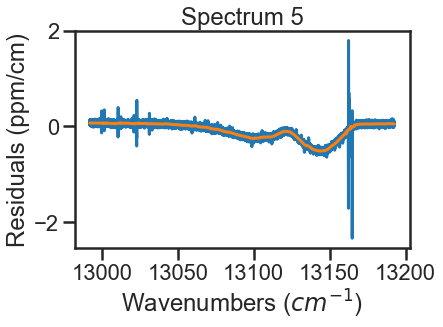

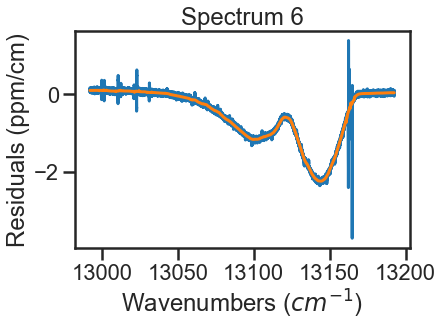

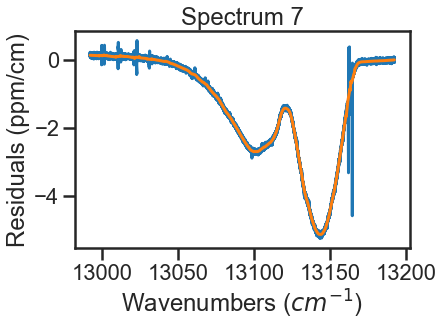

In [6]:
#Option 1 would be to traditional treat the CIA as the what is leftover method.  To do this we will use a filter to remove any resonant absorbance and then define the CIA as the negative of what is leftover

from scipy.signal import savgol_filter

def ad_hoc_CIA(spec):
    
    waves = spec.wavenumber
    resds = spec.residuals

    CIA = savgol_filter(resds, 501, 1) # Savitsky Golay Filte that uses a 501 pt sliding window with a first order polynomial to smooth the data.  These settings were arbitrary to smooth out the data.
    plt.plot(waves, resds)
    plt.plot(waves, CIA)
    plt.xlabel('Wavenumbers ($cm^{-1}$)')
    plt.ylabel('Residuals (ppm/cm)')
    plt.title( 'Spectrum '+ str(spec.spectrum_number))
    plt.show()
    spec.set_cia(-1*CIA)
ad_hoc_CIA(spec_1)
ad_hoc_CIA(spec_2)
ad_hoc_CIA(spec_3)
ad_hoc_CIA(spec_4)
ad_hoc_CIA(spec_5)
ad_hoc_CIA(spec_6)
ad_hoc_CIA(spec_7)

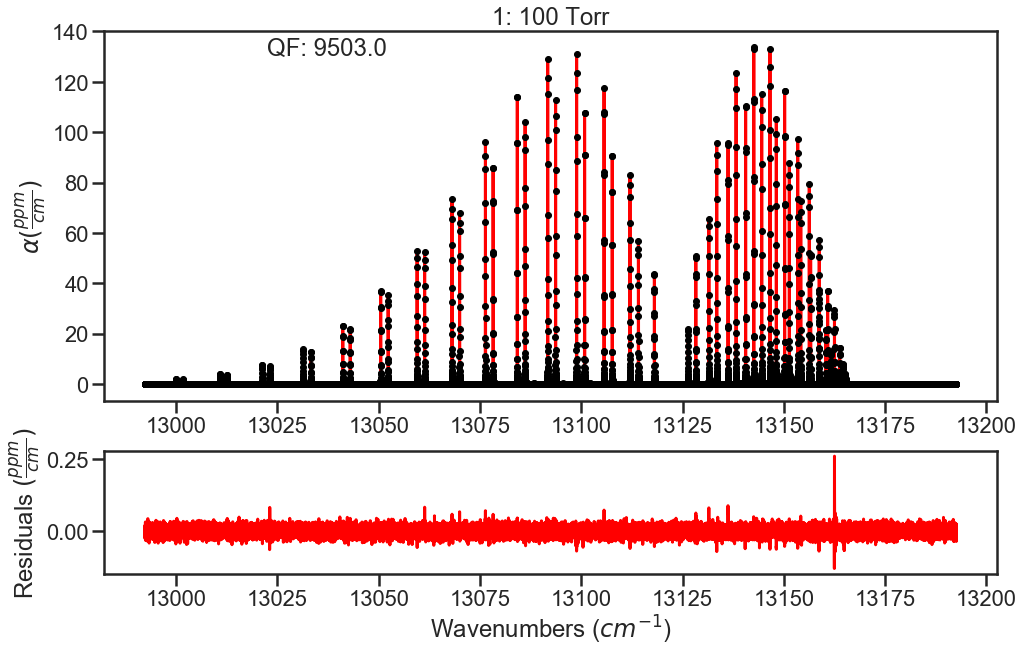

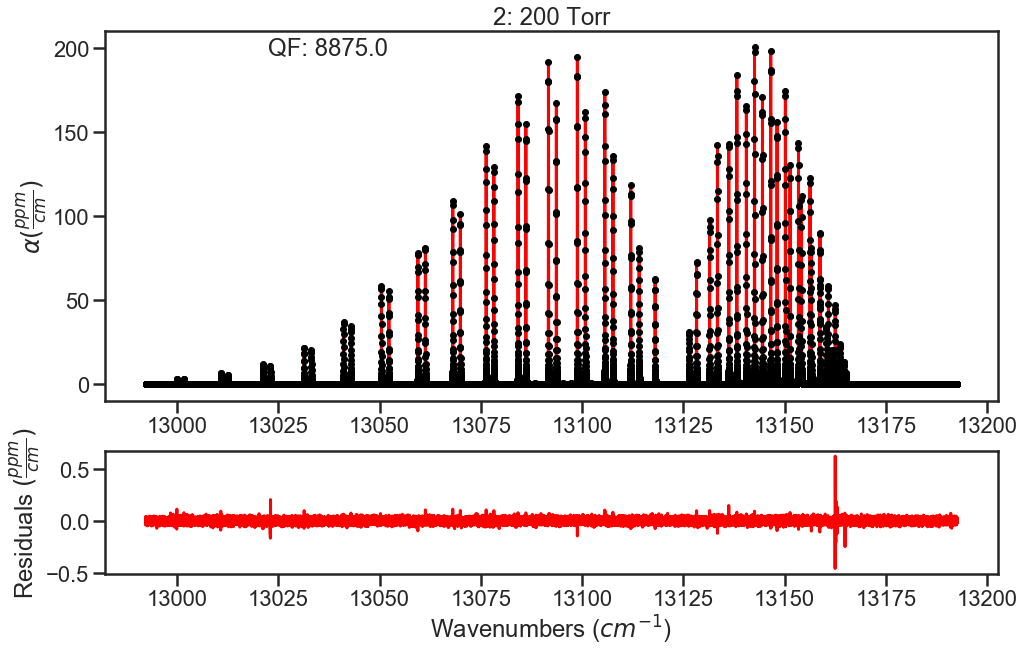

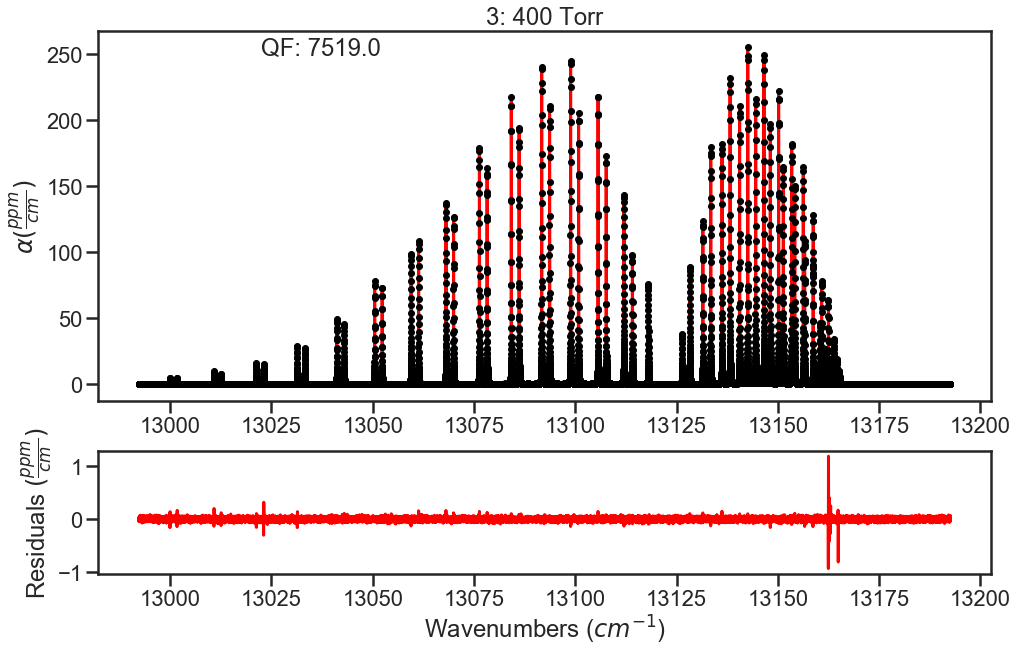

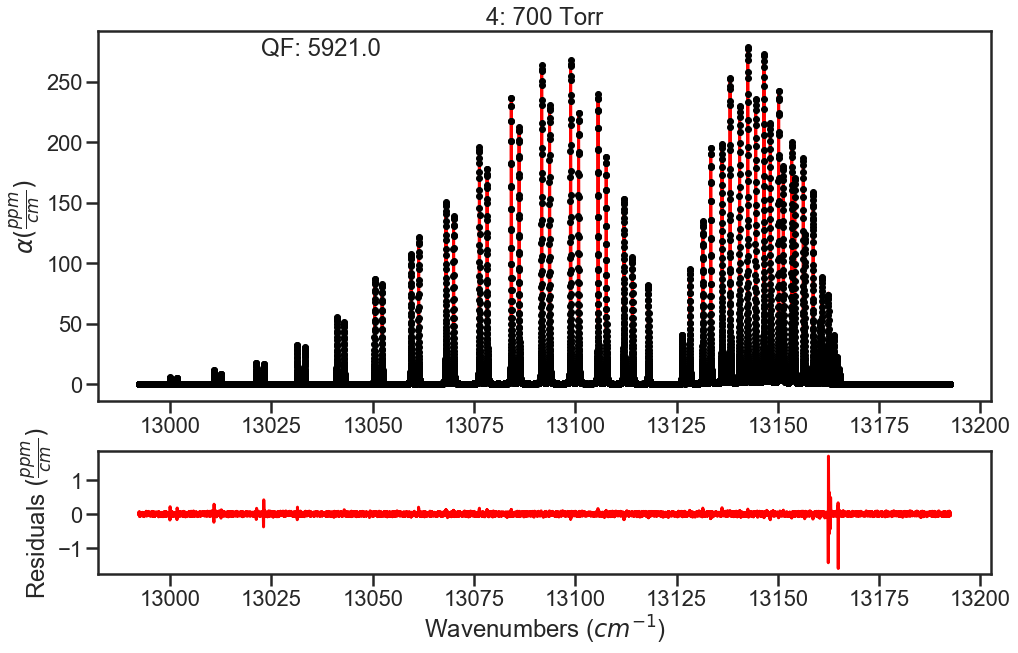

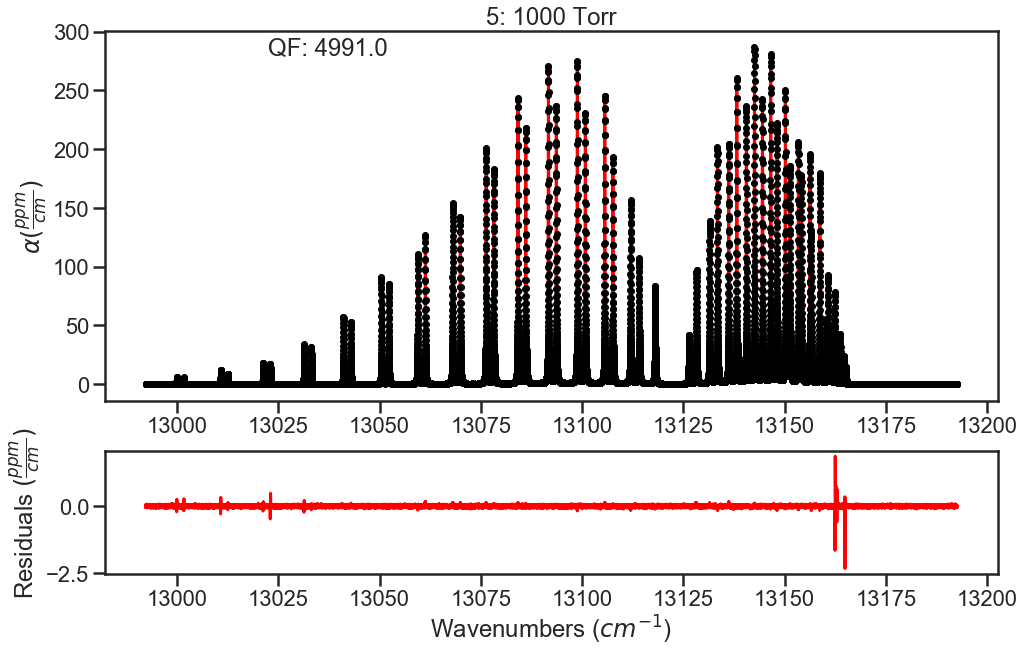

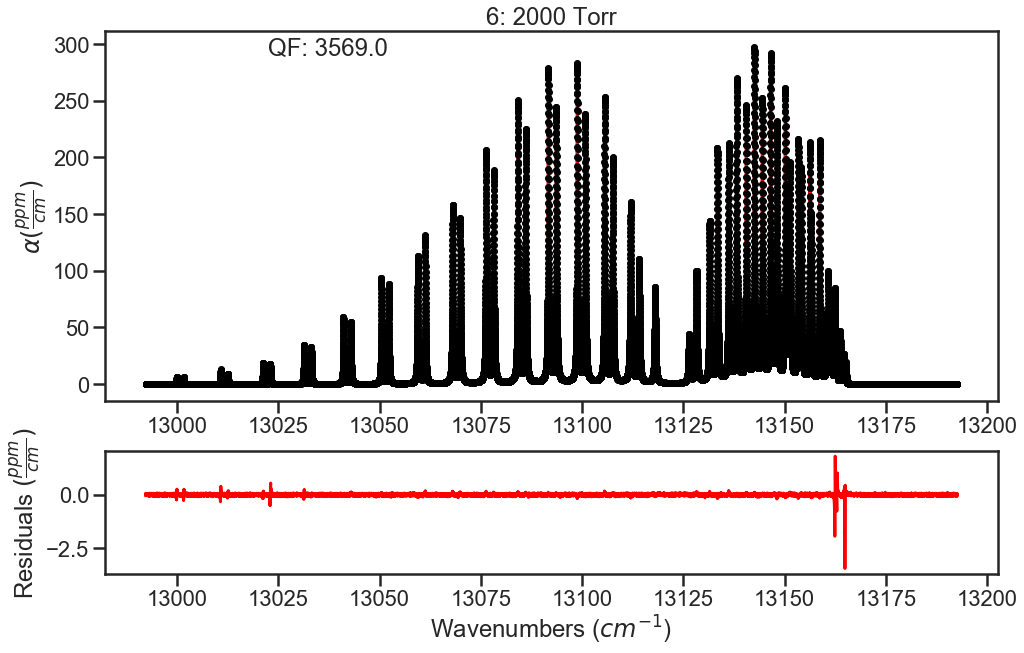

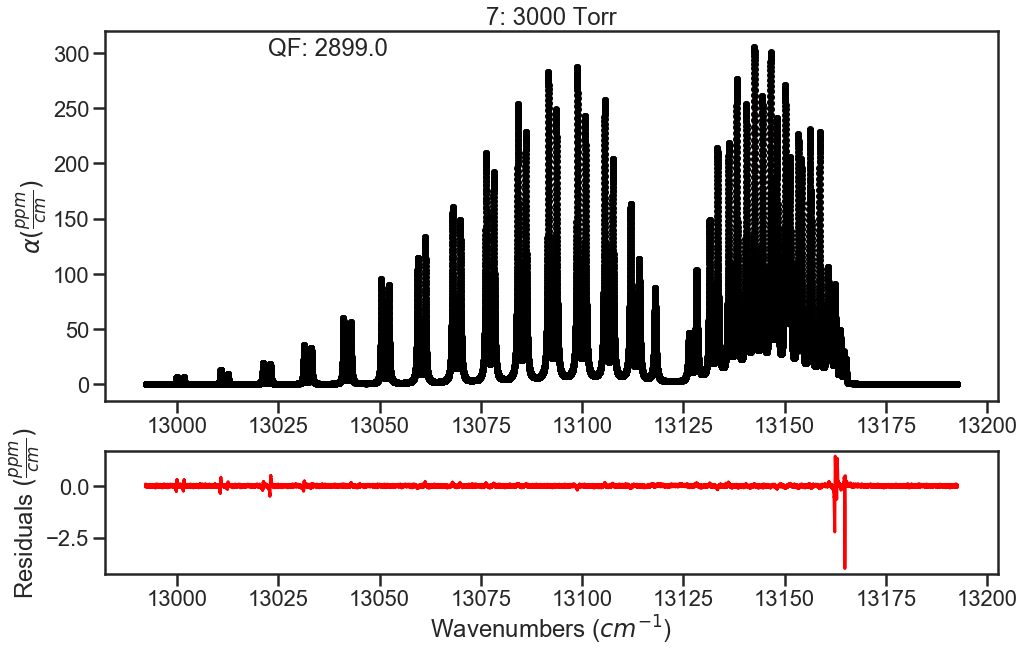

,Spectrum Number,Spectrum Name,Frequency (MHz),Wavenumber (cm-1),Pressure (Torr),Temperature (C),Tau (us),Tau Error (%),Alpha (ppm/cm),Model (ppm/cm),Residuals (ppm/cm),QF,Background,CIA (ppm/cm)
0,1,100 Torr,3.894976e+08,12992.240,100.0,25.0,16004.320115,None,0.002084,0.004073,0.001988,9503.0,0.133155,0.000185
1,1,100 Torr,3.894977e+08,12992.246,100.0,25.0,3936.671355,None,0.008473,0.004656,-0.003817,9503.0,0.133155,0.000176
2,1,100 Torr,3.894979e+08,12992.252,100.0,25.0,5691.690989,None,0.005861,0.005626,-0.000234,9503.0,0.133155,0.000168
3,1,100 Torr,3.894981e+08,12992.258,100.0,25.0,1046.679855,None,0.031869,0.007357,-0.024512,9503.0,0.133155,0.000160
4,1,100 Torr,3.894983e+08,12992.264,100.0,25.0,4650.263749,None,0.007173,0.010560,0.003387,9503.0,0.133155,0.000151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33390,7,3000 Torr,3.955036e+08,13192.580,3000.0,25.0,579.686835,None,0.057542,0.127855,0.070313,2899.0,0.133155,0.003442
33391,7,3000 Torr,3.955038e+08,13192.586,3000.0,25.0,168.204864,None,0.198308,0.119627,-0.078681,2899.0,0.133155,0.003416
33392,7,3000 Torr,3.955040e+08,13192.592,3000.0,25.0,286.509750,None,0.116423,0.119598,0.003175,2899.0,0.133155,0.003389
33393,7,3000 Torr,3.955041e+08,13192.598,3000.0,25.0,182.669788,None,0.182605,0.119569,-0.063036,2899.0,0.133155,0.003362


In [7]:
# Look at the results of using the "Leftover CIA"
fit_data = Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList',
                       minimum_parameter_fit_intensity = Fit_Intensity)
params = fit_data.generate_params()
for param in params:  
    if 'delta0' in param:
        params[param].set( min = -0.01, max = 0)
    if 'gamma0' in param:
        params[param].set( min = 0.02, max = 0.12)
    if 'SD_gamma' in param:
        params[param].set(min = 0, max = 0.3)   
    if 'nuVC' in param:
        params[param].set(min = 0, max = 0.3)
    if 'SD_delta' in param:
        params[param].set(min = 0, max = 0.3)        
    if 'sw_' in param:
        params[param].set(min = 0)
    

result = fit_data.fit_data(params, wing_wavenumbers = 50, wing_method = 'wing_wavenumbers', xtol = 1e-7, maxfev = 2000, ftol = 1e-7)

#print (result.params.pretty_print())

fit_data.residual_analysis(result, indv_resid_plot=True)
fit_data.update_params(result)
SPECTRA.generate_summary_file(save_file = True)

In [27]:
# Try to Fit the data using the Karman CIA model
linelist = r'C:\Users\ema3\Documents\MATS\MATS\Linelists' # Location of the Summary Data File
os.chdir(linelist)
PARAM_LINELIST = pd.read_csv('O2_ABand_Drouin_2017_linelist.csv')

os.chdir(path)

SPECTRA = Dataset([spec_1, spec_2, spec_3, spec_4, spec_5, spec_6, spec_7], 'CIA Spectra Study', PARAM_LINELIST, baseline_order = order_baseline_fit, CIA_model = 'Karman') 

#Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order
BASE_LINELIST = SPECTRA.generate_baseline_paramlist()
CIA_LINELIST = SPECTRA.generate_CIA_paramlist()

In [28]:
# Reset the CIA parameters based on the following guesses
CIA_LINELIST.loc[CIA_LINELIST['CIA Pair'] == 'O2_air', 'EXCH_scalar'] = 0
CIA_LINELIST.loc[CIA_LINELIST['CIA Pair'] == 'O2_air', 'SO_scalar'] = 0.5
CIA_LINELIST.loc[CIA_LINELIST['CIA Pair'] == 'O2_air', 'SO_l'] = 1

In [29]:

FITPARAMS = Generate_FitParam_File(SPECTRA, PARAM_LINELIST, BASE_LINELIST, CIA_linelist = CIA_LINELIST,
                                   lineprofile = 'SDVP', linemixing = True, 
                                      fit_intensity = Fit_Intensity, threshold_intensity = Fit_Intensity, 
                                      nu_constrain = True, sw_constrain = True, gamma0_constrain = True, delta0_constrain = True, 
                                       aw_constrain = True, as_constrain = True, 
                                       nuVC_constrain = True, eta_constrain =True, linemixing_constrain = True)


FITPARAMS.generate_fit_param_linelist_from_linelist(vary_nu = {7:{1:False, 2:False, 3:False}}, vary_sw = {7:{1:False, 2:False, 3:False}},
                                                    vary_gamma0 = {7:{1: False, 2:False, 3: False}}, vary_n_gamma0 = {7:{1:False}}, 
                                                    vary_delta0 = {7:{1: False, 2:False, 3: False}}, vary_n_delta0 = {7:{1:False}}, 
                                                    vary_aw = {7:{1: False, 2:False, 3: False}}, vary_n_gamma2 = {7:{1:False}}, 
                                                    vary_as = {7:{1:False}}, vary_n_delta2 = {7:{1:False}}, 
                                                    vary_nuVC = {7:{1:False}}, vary_n_nuVC = {7:{1:False}},
                                                    vary_eta = {}, vary_linemixing = {7:{1:False}})

FITPARAMS.generate_fit_baseline_linelist(vary_baseline = True, vary_molefraction = {7:False, 1:False}, vary_xshift = False, 
                                      vary_etalon_amp= False, vary_etalon_period= False, vary_etalon_phase= False)


FITPARAMS.generate_fit_KarmanCIA_linelist(vary_EXCH_scalar = False, vary_EXCH_gamma = True, vary_EXCH_l = False, 
                                  vary_SO_scalar = True, vary_SO_ahard = True, vary_SO_l = False, vary_bandcenter = False, vary_Nmax = False)

USE CAUTION WHEN FLOATING EXCH_GAMMA
USE CAUTION WHEN FLOATING SO_AHARD


,CIA Pair,EXCH_scalar,EXCH_scalar_err,EXCH_scalar_vary,EXCH_gamma,EXCH_gamma_err,EXCH_gamma_vary,EXCH_l,EXCH_l_err,EXCH_l_vary,...,SO_ahard_vary,SO_l,SO_l_err,SO_l_vary,bandcenter,bandcenter_err,bandcenter_vary,Nmax,Nmax_err,Nmax_vary
0,O2_air,0,0,False,3,0,True,2,0,False,...,True,1,0,False,13122,0,False,31,0,False


In [ ]:
fit_data = Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList', 
                       CIA_linelist_file = 'CIA_LineList', CIA_calculate = True, CIA_model = 'Karman',
                       minimum_parameter_fit_intensity = Fit_Intensity)
params = fit_data.generate_params()
for param in params:  
    if 'delta0' in param:
        params[param].set( min = -0.01, max = 0)
    if 'gamma0' in param:
        params[param].set( min = 0.02, max = 0.12)
    if 'SD_gamma' in param:
        params[param].set(min = 0, max = 0.3)   
    if 'nuVC' in param:
        params[param].set(min = 0, max = 0.3)
    if 'SD_delta' in param:
        params[param].set(min = 0, max = 0.3)        
    if 'sw_' in param:
        params[param].set(min = 0)
    

result = fit_data.fit_data(params, wing_wavenumbers = 50, wing_method = 'wing_wavenumbers', xtol = 1e-7, maxfev = 2000, ftol = 1e-7)

print (result.params.pretty_print())

fit_data.residual_analysis(result, indv_resid_plot=True)
fit_data.update_params(result)
SPECTRA.generate_summary_file(save_file = True)

###### spec_4.model.max()
